##### matrix #####

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. DATA GENERATION


# Generate hourly timestamps for 30 days
date_range = pd.date_range(
    start="2024-01-01",
    periods=24 * 30,
    freq="H"
)

# Generate realistic electricity consumption values (MW)
np.random.seed(10)
consumption = np.random.normal(
    loc=450,    # average consumption
    scale=80,   # variation
    size=len(date_range)
).astype(int)

# Create DataFrame
df = pd.DataFrame({
    "Timestamp": date_range,
    "Consumption_MW": consumption
})

print("\nSample Data:")
print(df.head())


Sample Data:
            Timestamp  Consumption_MW
0 2024-01-01 00:00:00             556
1 2024-01-01 01:00:00             507
2 2024-01-01 02:00:00             326
3 2024-01-01 03:00:00             449
4 2024-01-01 04:00:00             499


/tmp/ipython-input-3247887555.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(


In [ ]:

# 2. DATA PREPROCESSING


df["Hour"] = df["Timestamp"].dt.hour
df["Date"] = df["Timestamp"].dt.date


In [ ]:

# 3. HOURLY CONSUMPTION ANALYSIS


hourly_avg = df.groupby("Hour")["Consumption_MW"].mean()
hourly_variance = df.groupby("Hour")["Consumption_MW"].var()


In [ ]:

# 4. PEAK LOAD DETECTION


peak_hour = hourly_avg.idxmax()
peak_load = hourly_avg.max()

print("\nPeak Load Analysis:")
print(f"Peak Hour       : {peak_hour}:00")
print(f"Peak Consumption: {peak_load:.2f} MW")


Peak Load Analysis:
Peak Hour       : 8:00
Peak Consumption: 486.57 MW


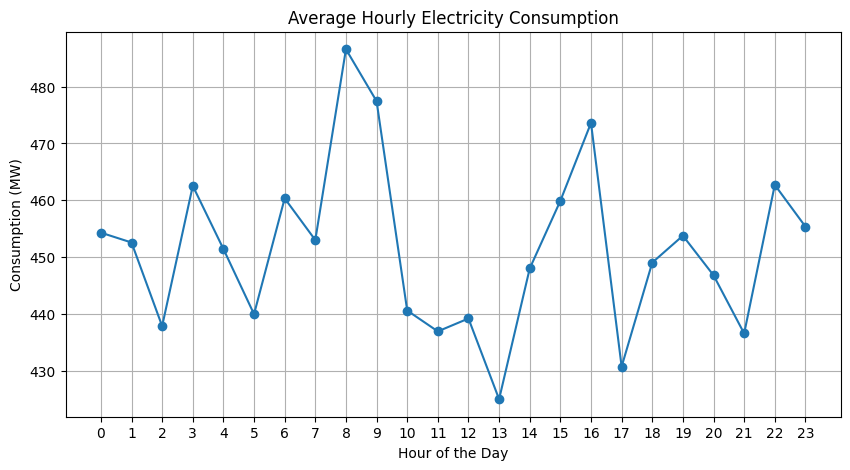

In [ ]:

# 5. LINE PLOT - HOURLY AVERAGE CONSUMPTION


plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title("Average Hourly Electricity Consumption")
plt.xlabel("Hour of the Day")
plt.ylabel("Consumption (MW)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

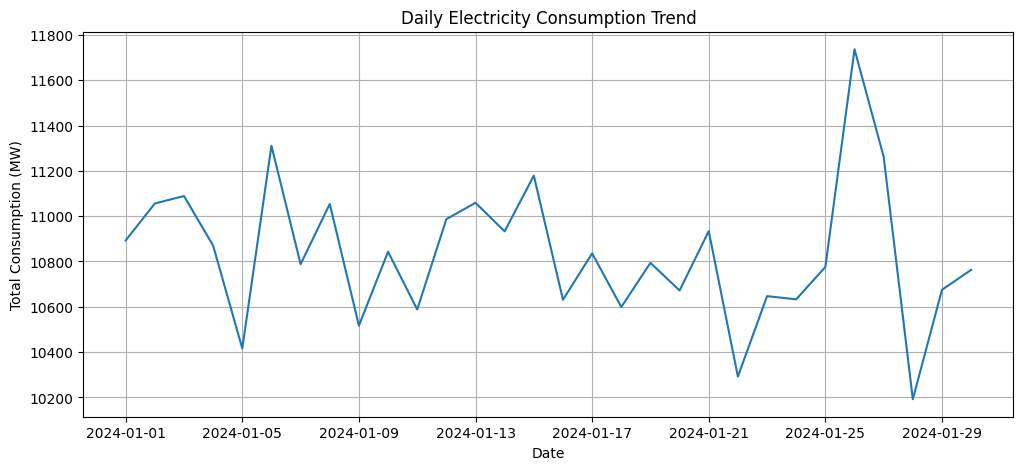

In [ ]:

# 6. DAILY CONSUMPTION TREND


daily_consumption = df.groupby("Date")["Consumption_MW"].sum()

plt.figure(figsize=(12, 5))
plt.plot(daily_consumption.index, daily_consumption.values)
plt.title("Daily Electricity Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Total Consumption (MW)")
plt.grid(True)
plt.show()

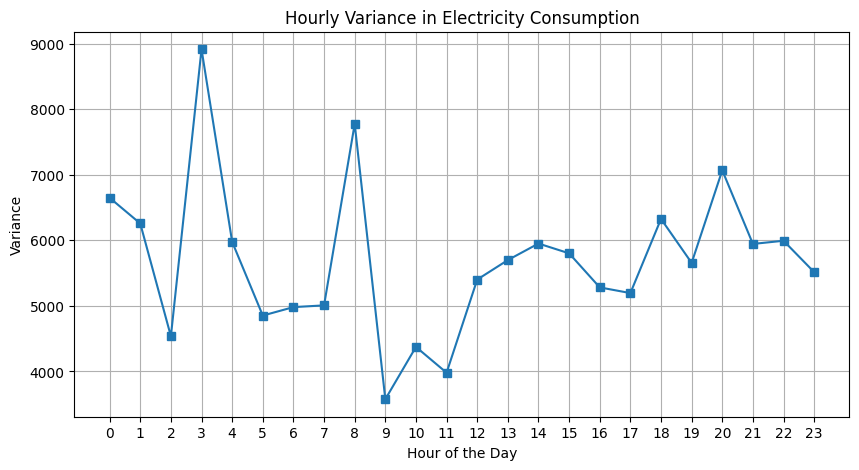

In [ ]:

# 7. VARIANCE PLOT

plt.figure(figsize=(10, 5))
plt.plot(hourly_variance.index, hourly_variance.values, marker='s')
plt.title("Hourly Variance in Electricity Consumption")
plt.xlabel("Hour of the Day")
plt.ylabel("Variance")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

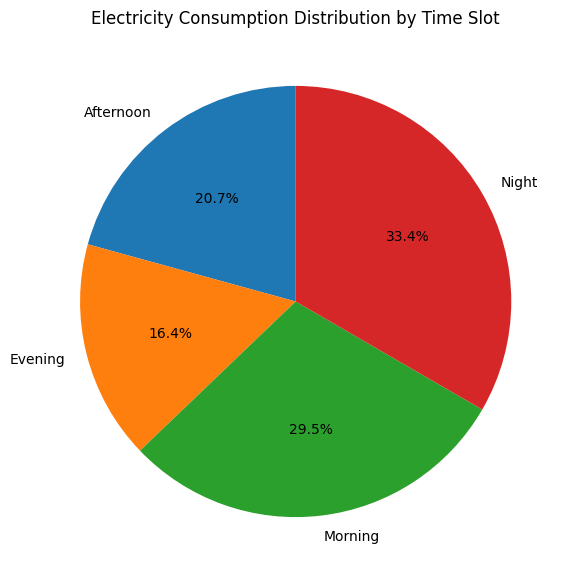

In [ ]:

# 8. PIE CHART - CONSUMPTION BY TIME SLOTS


# Categorize hours into time slots
def time_slot(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df["Time_Slot"] = df["Hour"].apply(time_slot)

slot_consumption = df.groupby("Time_Slot")["Consumption_MW"].sum()

plt.figure(figsize=(7, 7))
plt.pie(
    slot_consumption.values,
    labels=slot_consumption.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Electricity Consumption Distribution by Time Slot")
plt.show()

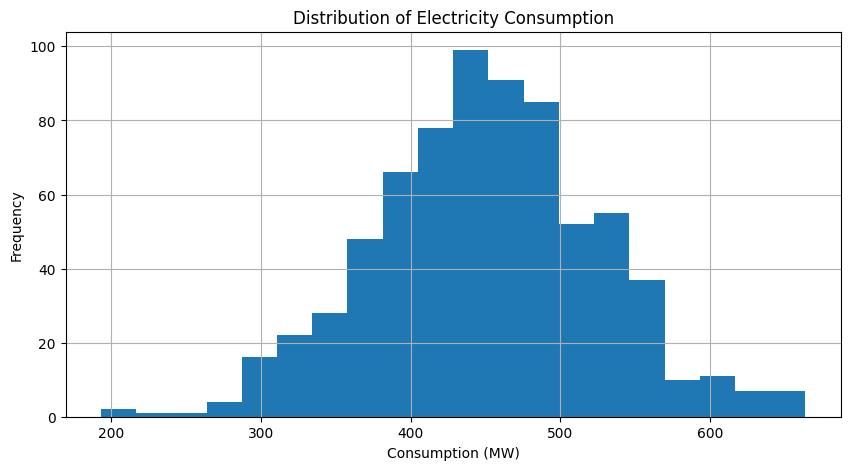

In [ ]:

# 9. HISTOGRAM - CONSUMPTION DISTRIBUTION


plt.figure(figsize=(10, 5))
plt.hist(df["Consumption_MW"], bins=20)
plt.title("Distribution of Electricity Consumption")
plt.xlabel("Consumption (MW)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:

# 10. STATISTICAL SUMMARY


print("\nStatistical Summary:")
print(df["Consumption_MW"].describe())


Statistical Summary:
count    720.000000
mean     451.425000
std       75.656036
min      193.000000
25%      403.000000
50%      452.000000
75%      499.000000
max      664.000000
Name: Consumption_MW, dtype: float64


In [ ]:

# 11. FINAL INSIGHTS


print("\nFinal Insights:")
print("- Electricity consumption varies significantly throughout the day.")
print(f"- Peak demand occurs at {peak_hour}:00 hours.")
print("- Evening and night slots contribute major load.")
print("- Histogram shows overall consumption distribution.")
print("- Variance analysis highlights unstable demand hours.")



Final Insights:
- Electricity consumption varies significantly throughout the day.
- Peak demand occurs at 8:00 hours.
- Evening and night slots contribute major load.
- Histogram shows overall consumption distribution.
- Variance analysis highlights unstable demand hours.
